# Random Forest

## Random Tree
- Hard to pick the *best* in high dimensions (i.e., very expensive)
    - Instead we pick a number of random directions to search and take the optimal split among those
- A randomized tree will not be optimal but much faster to build

## Forest of Random Trees
- Create multiple randomized trees to classify
- Combine the results, e.g., voting, bagging, bootstrapping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data[:, :2]     # only first 2 features for 2D plotting
c = data.target          # class labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

h = 0.01
x, y = np.meshgrid(
    np.arange(X[:,0].min() - 0.5, X[:,0].max() + 0.5, h),
    np.arange(X[:,1].min() - 0.5, X[:,1].max() + 0.5, h)
)
grid = np.c_[x.ravel(), y.ravel()]

array([0.66666667, 0.66666667, 0.73333333, 0.86666667, 0.73333333,
       0.73333333, 0.73333333, 0.8       , 0.8       , 0.86666667])

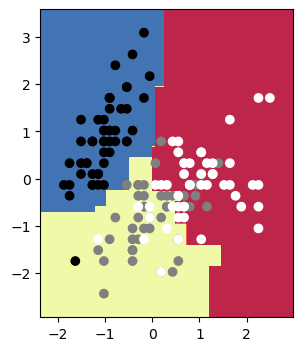

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=50,max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)

plt.figure(figsize=(4,4)); plt.subplot(111,aspect='equal')
plt.contourf(x,y,z, cmap=plt.cm.Spectral_r)
plt.scatter(X[:,0],X[:,1], c=c, cmap=plt.cm.gray);

cross_val_score(clf, X,c, cv=10)

## Assumptions and Limitations
- Axis parallel boundaries might be suboptimal
- But there is no need for a distance function
- And improved by random forest with many trees
- Improvements in the estimation error by random forest (CLT)

## Feature Selection
- How frequently do we use a feature to split?

In [3]:
clf.feature_importances_

array([0.50693511, 0.49306489])

## Divide and Conquer
- These methods are applicable to regression problems
    - Minimize the variance of the left and right partitions e.g., piecewise constant
- Useful concepts to consider to build complex methods

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Build pipeline
pipe = Pipeline([
    ("clf", DecisionTreeClassifier())
])

# Define hyperparameter grid (split-related parameters)
param_grid = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": [1, 2, 3, 4, 5, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4]
}

# Run GridSearch
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X, c)

# Print best results
print("Best CV Score:", grid.best_score_)
print("Best Split Parameters:")
print(grid.best_params_)

Best CV Score: 0.8000000000000002
Best Split Parameters:
{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
